### Building a CNN using Keras
#### Dataset Fashion MNIST

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


### Data Preparation

In [2]:
x = pd.read_csv("./Dataset/fashion-mnist.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape) #10 classes

(10000, 784) (10000,)


In [3]:
np.unique(y,return_counts=True) #Well Balanced 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [4]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)


(10000, 28, 28, 1) (10000, 10)


In [5]:
import matplotlib.pyplot as plt

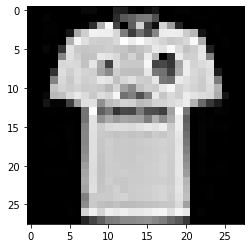

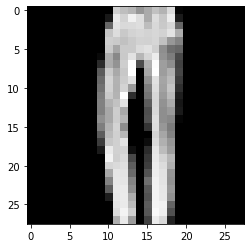

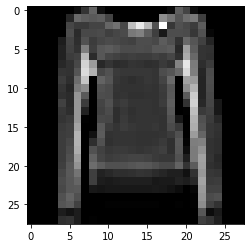

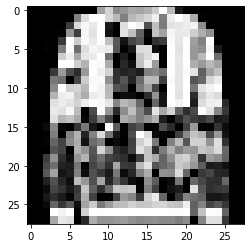

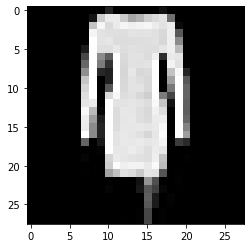

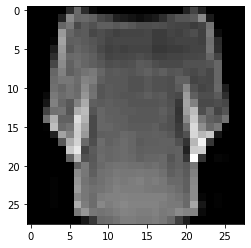

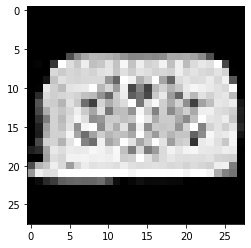

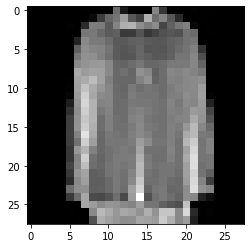

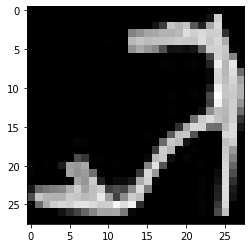

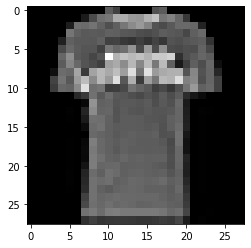

In [6]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

## CNN Model

In [7]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

W0726 22:55:37.871081  4488 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 22:55:39.778849  4488 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 22:55:40.979375  4488 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0726 22:55:42.145004  4488 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [8]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

W0726 22:55:58.716054  4488 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 22:55:58.837983  4488 deprecation_wrapper.py:119] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

W0726 22:56:05.168947  4488 deprecation.py:323] From c:\users\ramesh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 92s 11ms/step - loss: 1.6746 - acc: 0.3912 - val_loss: 0.8903 - val_acc: 0.6995
Epoch 2/20
8000/8000 [==============================] - 83s 10ms/step - loss: 0.7747 - acc: 0.7180 - val_loss: 0.6906 - val_acc: 0.7505
Epoch 3/20
8000/8000 [==============================] - 61s 8ms/step - loss: 0.6323 - acc: 0.7679 - val_loss: 0.6183 - val_acc: 0.7865
Epoch 4/20
8000/8000 [==============================] - 59s 7ms/step - loss: 0.5557 - acc: 0.7953 - val_loss: 0.5707 - val_acc: 0.7950
Epoch 5/20
8000/8000 [==============================] - 63s 8ms/step - loss: 0.5165 - acc: 0.8111 - val_loss: 0.5402 - val_acc: 0.8130
Epoch 6/20
8000/8000 [==============================] - 67s 8ms/step - loss: 0.4767 - acc: 0.8270 - val_loss: 0.5101 - val_acc: 0.8115
Epoch 7/20
8000/8000 [==============================] - 54s 7ms/step - loss: 0.4525 - acc: 0.8355 - val_loss: 0.4749 - val_acc: 0.8305
Epoch

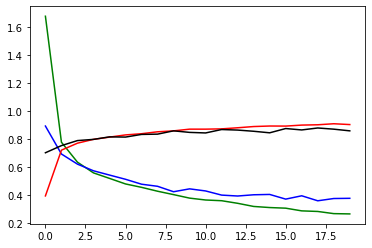

In [10]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()
